In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, auc, roc_curve
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from keras_visualizer import visualizer 

importing Jupyter notebook from BDM_prepare_clean_data.ipynb
<class 'pandas.core.frame.DataFrame'>
Int64Index: 72000 entries, 1 to 72000
Data columns (total 82 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GDENAMK                         72000 non-null  object 
 1   GDENR                           72000 non-null  int64  
 2   KTKZ                            72000 non-null  object 
 3   address                         72000 non-null  object 
 4   area                            57767 non-null  float64
 5   balcony                         34520 non-null  float64
 6   basement                        976 non-null    float64
 7   bath                            496 non-null    float64
 8   cabletv                         24906 non-null  float64
 9   cheminee                        3330 non-null   float64
 10  date                            72000 non-null  object 
 11  descr                           

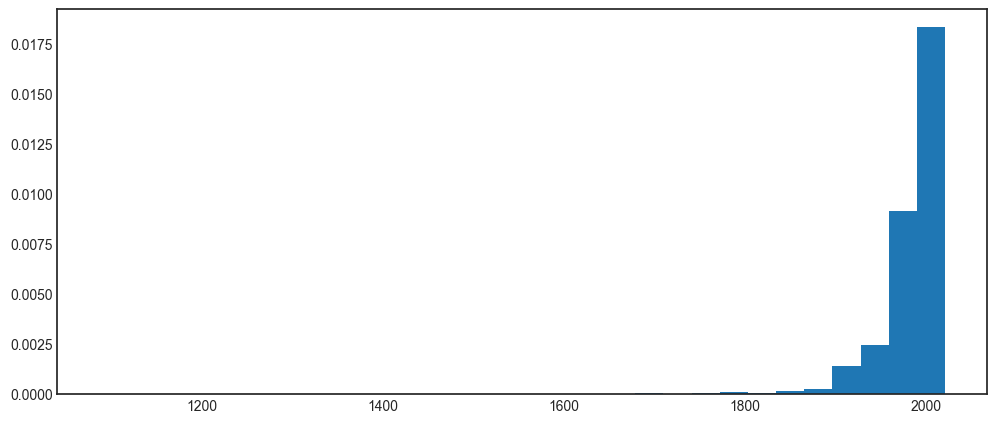

Shape of X_train: (55255, 168)
Shape of y_train: (55255,)
Shape of X_valid: (13814, 168)
Shape of y_valid: (13814,)
Features: 168, Obs: 69'069, MSE: 139'574
Features: 168, Obs: 69'069, MSE: 142'652


C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


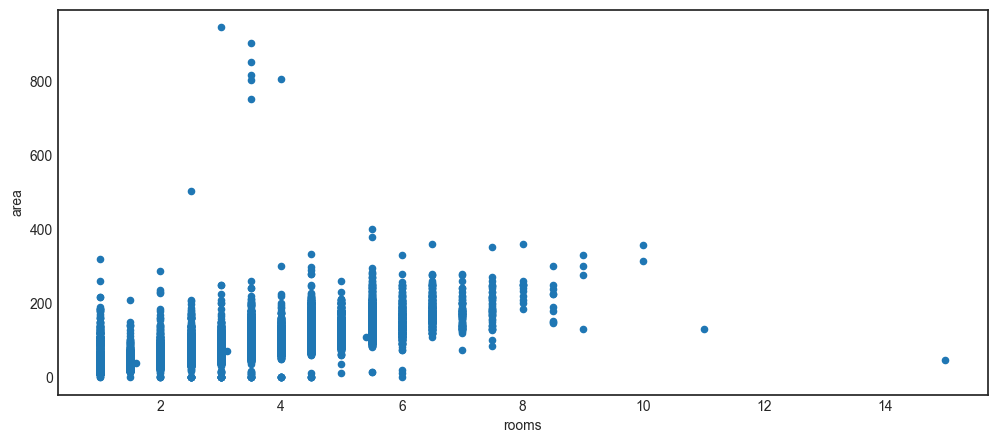

In [2]:
#Import the data from the Data cleaning file
import import_ipynb
import BDM_prepare_clean_data as data_cleaned

In [23]:
#Import the datasets
X_train = data_cleaned.X_train
X_valid = data_cleaned.X_valid
y_train = data_cleaned.y_train
y_valid = data_cleaned.y_valid
X = data_cleaned.X
Y = data_cleaned.y
df_test = data_cleaned.df_test
df_test_missing = data_cleaned.df_test_missing 

In [4]:
#Variable definition
dim = X.shape[1]
batch_size = 100
epochs = 100

In [5]:
#Basic Model
model1 = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(6, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation="relu")
])

model1.compile(loss='mean_squared_error', optimizer='adam')

#Visulize the model
visualizer(model1, file_name="Models_final/Basic Model", file_format="png", view=False)

In [6]:
#Train the Basic model
model1_history = model1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                            validation_split=(0.2),
                            shuffle=True)

Epoch 1/100
443/443 [==============================] - 12s 10ms/step - loss: 1937854.5000 - val_loss: 499423.5000
Epoch 2/100
443/443 [==============================] - 3s 7ms/step - loss: 344642.1250 - val_loss: 259366.5000
Epoch 3/100
443/443 [==============================] - 3s 7ms/step - loss: 214019.3281 - val_loss: 180377.7500
Epoch 4/100
443/443 [==============================] - 3s 8ms/step - loss: 163877.2656 - val_loss: 158148.7812
Epoch 5/100
443/443 [==============================] - 3s 7ms/step - loss: 146267.2500 - val_loss: 148276.1875
Epoch 6/100
443/443 [==============================] - 3s 6ms/step - loss: 137121.0312 - val_loss: 142516.2656
Epoch 7/100
443/443 [==============================] - 3s 8ms/step - loss: 132115.8281 - val_loss: 139604.7500
Epoch 8/100
443/443 [==============================] - 4s 8ms/step - loss: 128703.3906 - val_loss: 137424.4844
Epoch 9/100
443/443 [==============================] - 3s 7ms/step - loss: 125982.2969 - val_loss: 136560.750

In [12]:
#Predictions
yhat = model1.predict(X_valid)
    # summarize prediction
print(f"r2: {r2_score(y_valid, yhat)}")
print(f"mse: {mean_squared_error(y_valid, yhat)}")

432/432 [==============================] - 1s 2ms/step
r2: 0.7648306310859998
mse: 104274.85597110984


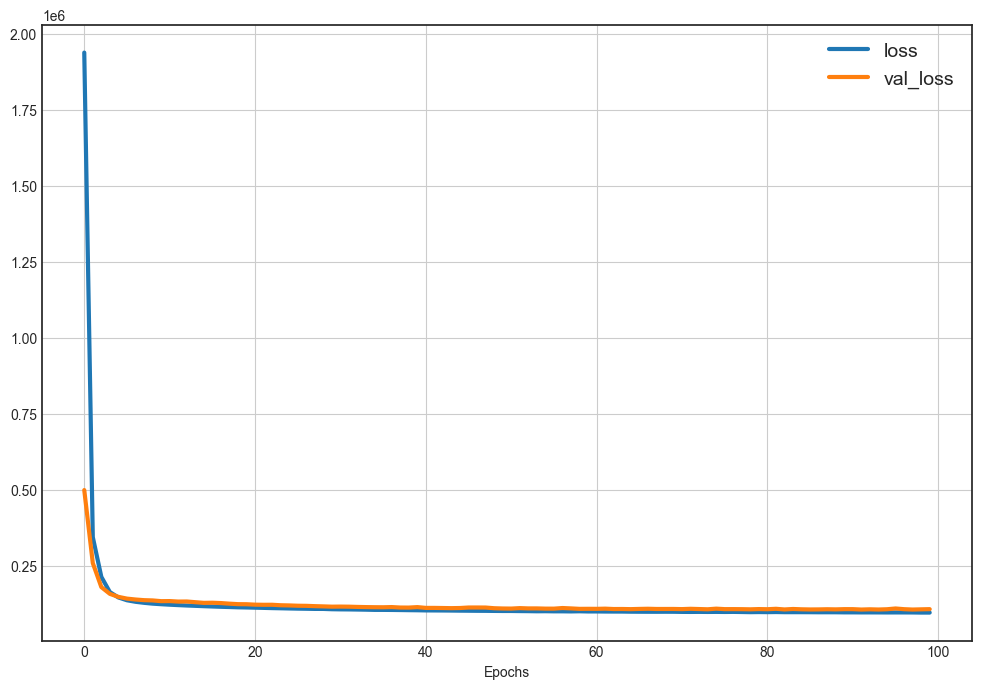

In [7]:
#Visualize the learning curve of the Basic Model
pd.DataFrame(model1_history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.xlabel("Epochs")
plt.show()

In [13]:
#Predictions
yhat = complex_model1.predict(X_valid)
    # summarize prediction
print(f"r2: {r2_score(y_valid, yhat)}")
print(f"mse: {mean_squared_error(y_valid, yhat)}")

432/432 [==============================] - 2s 3ms/step
r2: 0.7666533669764728
mse: 103466.6490038073


In [27]:
#Coplex Model
complex_model2 = keras.models.Sequential([
    keras.layers.Dense(256, activation='elu',kernel_initializer='he_uniform', input_shape=(dim,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='elu', kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='elu', kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='elu', kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='elu')
])

complex_model2.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
complex_model2_history = complex_model2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                            validation_split=(0.2),
                            shuffle=True)

Epoch 1/100
443/443 [==============================] - 8s 12ms/step - loss: 678700.7500 - val_loss: 168397.6875
Epoch 2/100
443/443 [==============================] - 5s 11ms/step - loss: 215555.3281 - val_loss: 153980.8906
Epoch 3/100
443/443 [==============================] - 5s 11ms/step - loss: 195855.3750 - val_loss: 136057.1406
Epoch 4/100
443/443 [==============================] - 5s 12ms/step - loss: 186490.6875 - val_loss: 138053.2188
Epoch 5/100
443/443 [==============================] - 4s 10ms/step - loss: 180646.7969 - val_loss: 127886.5469
Epoch 6/100
443/443 [==============================] - 5s 12ms/step - loss: 175295.5312 - val_loss: 124886.1172
Epoch 7/100
443/443 [==============================] - 4s 9ms/step - loss: 166446.9375 - val_loss: 121677.6406
Epoch 8/100
443/443 [==============================] - 5s 12ms/step - loss: 165457.5938 - val_loss: 118657.1016
Epoch 9/100
443/443 [==============================] - 5s 12ms/step - loss: 161258.2969 - val_loss: 11209

In [29]:
#Predictions
yhat = complex_model2.predict(X_valid)
    # summarize prediction
print(f"r2: {r2_score(y_valid, yhat)}")
print(f"mse: {mean_squared_error(y_valid, yhat)}")

432/432 [==============================] - 3s 5ms/step
r2: 0.7762815836737853
mse: 99197.46669487296


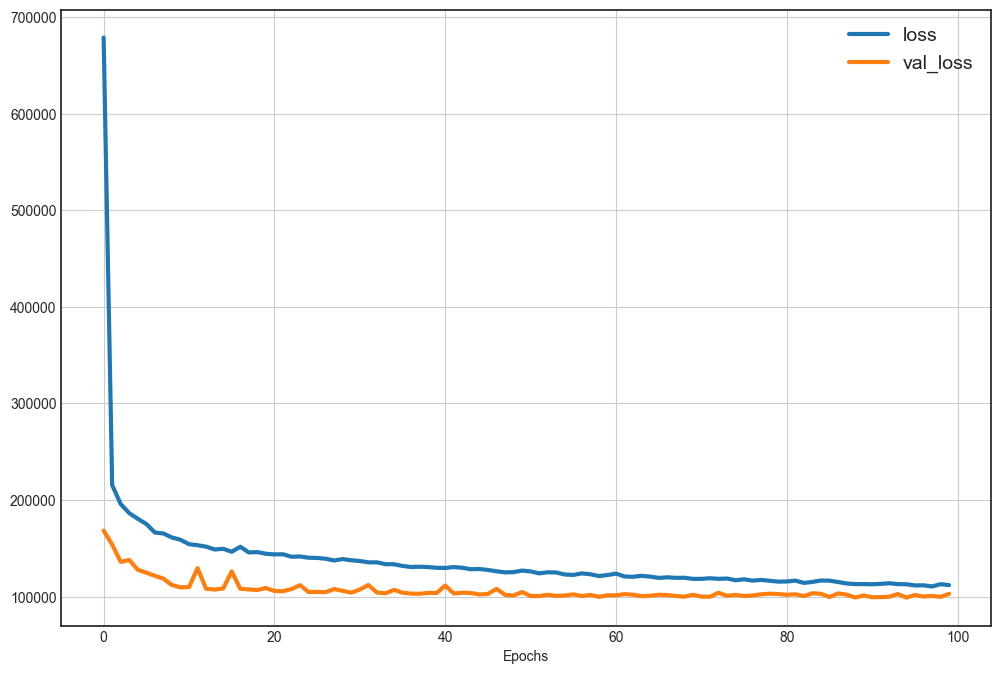

In [31]:
#Visualize the learning curve of the complex Model
pd.DataFrame(complex_model2_history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.xlabel("Epochs")
plt.show()

# Make prediction on final test data

In [49]:
complex_model2.fit(X, Y, batch_size=batch_size, epochs=epochs,
                            validation_split=(0.2),
                            shuffle=True)

Epoch 1/100
553/553 [==============================] - 10s 18ms/step - loss: 96279.0391 - val_loss: 86535.3672
Epoch 2/100
553/553 [==============================] - 8s 15ms/step - loss: 97675.3984 - val_loss: 85997.7891
Epoch 3/100
553/553 [==============================] - 9s 16ms/step - loss: 95926.7578 - val_loss: 87174.7656
Epoch 4/100
553/553 [==============================] - 8s 15ms/step - loss: 95358.9766 - val_loss: 87287.2812
Epoch 5/100
553/553 [==============================] - 9s 16ms/step - loss: 95774.1406 - val_loss: 89600.0625
Epoch 6/100
553/553 [==============================] - 8s 15ms/step - loss: 95925.0156 - val_loss: 88926.2969
Epoch 7/100
553/553 [==============================] - 9s 17ms/step - loss: 94401.1797 - val_loss: 87648.4609
Epoch 8/100
553/553 [==============================] - 10s 18ms/step - loss: 95545.9531 - val_loss: 89713.0469
Epoch 9/100
553/553 [==============================] - 9s 17ms/step - loss: 96866.9453 - val_loss: 87238.9766
Epoch 10

In [72]:
def Predict(test_data, model, missing):
  yhat = model.predict(test_data)
  yhat = [item for sublist in yhat for item in sublist]
  temp1 = pd.DataFrame({'idx': test_data.index, 'values': yhat})
  temp2 = pd.DataFrame({'idx': missing.index})
  temp = pd.concat([temp1,temp2],axis=0).sort_values(by='idx')
  if temp['idx'].duplicated().any() == True: print('ATTENTION: Some indexes are duplicated.') # flagging errors
  yhat = temp['values'].to_list()
  
  return(yhat)

In [73]:
submission = pd.DataFrame(Predict(df_test, complex_model2, df_test_missing))
submission.index += 1 # so index starts at 1 not 0

552/552 [==============================] - 3s 6ms/step


In [74]:
submission.to_csv("Prediction_NN.csv", index=True, header=False)